In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os

Read first waveform file (channel 0)

In [79]:
def read_data(infile):
    with open(infile, 'rb') as f:
        nevent = 0
        notEOF = True
        max_nevent = 1000000000
        xList, eventList, tList, tDAQ, = [], [], [], []

        print(infile)
        
        while notEOF and nevent < max_nevent:
            # read header: record, boardID, channel, pattern, event, time_ns
            s = f.read(24)
            if len(s) != 24:
                notEOF = False
                break
            record, boardID, channel, pattern, event, time_ns = struct.unpack("<LLLLLL", s)
            #print(record, boardID, channel, pattern, event, time_ns)

            # read data: record = 24 (6*4Byte) header length 
            #                       + Byte length of the waveform event (16 bit per sample)
            s = f.read(record-24)
            if len(s) != (record-24):
                notEOF = False
                break
            format = "<"+str(int((record-24)/2))+"H"
            #print(format)
            data = struct.unpack(format, s)

            # determine the baseline signal (average of first 10 samples)
            x0 = 0
            for i in range(10):
                x0 += data[i]
            #x0 /= 10.

            # find the maximum peak in the waveform event (sliding average of 10 samples)
            imax = 0
            xmax, xsum = 0., 0.
            for i in range(10,int((record-24)/2)):
                xsum = xsum + data[i-10] - data[i]
                # xsum = data[i] - x0
                if xmax < xsum:
                    xmax = xsum
                    imax = i
            xList.append(xmax)
            eventList.append(event)
            tList.append(imax * 8)
            tDAQ.append(time_ns * 8)
            nevent = nevent + 1
        
        '''
        nevent: Total number of events in this channel
        xList: List with the signal amplitudes (generated from a sliding average)
        eventList: List with event IDs
        tList: List with the relative timestamps of the signal peaks within the trigger window
        tDAQ: List with the absolute timestamps of the trigger windows within the whole DAQ period
        '''
        return nevent, xList, eventList, tList, tDAQ

# Get list of files in current directory
fileList = [x for x in os.listdir('.') if '.dat' in x]

for file in fileList:
    nevent0, xList0, eventList0, tList0,  tDAQ0 = read_data(file)
    data_array_0 = np.transpose(np.array((xList0,eventList0,tList0,tDAQ0)))    
    np.savetxt(file[0:-4]+".csv", data_array_0, delimiter=", ", header="ADC counts, event no., timestamp, absolute time")

wave0_co_0deg_2.dat
wave1_co_90deg_2.dat
wave0_bkg_45deg.dat
wave0_co_45deg_2.dat
wave1_bkg_45deg.dat
wave0_co_90deg_1.dat
wave0_co_90deg_4.dat
wave0_co_45deg_1.dat
wave1_co_45deg_2.dat
wave0_co_90deg_3.dat
wave1_co_45deg_3.dat
wave1_co_0deg_3.dat
wave1_na_0deg.dat
wave1_co_0deg_4.dat
wave0_co_0deg_4.dat
wave0_co_45deg_3.dat
wave1_co_45deg_1.dat
wave1_co_0deg_1.dat
wave1_co_90deg_3.dat
wave1_co_90deg_4.dat
wave0_co_45deg_4.dat
wave0_co_0deg_1.dat
wave0_bkg_0deg.dat
wave1_bkg_0deg.dat
wave1_co_45deg_4.dat
wave1_co_90deg_1.dat
wave1_co_0deg_2.dat
wave0_co_0deg_3.dat
wave0_co_90deg_2.dat
wave0_na_0deg.dat


In [68]:
# wave0 files
files0 = ["wave0_bkg_0deg.csv", "wave0_bkg_45deg.csv", "wave0_na_0deg.csv"]#, "wave0_co_0deg_1.csv"]
# wave1 files
files1 = ["wave1_bkg_0deg.csv", "wave1_bkg_45deg.csv", "wave1_na_0deg.csv"]#, "wave1_co_0deg_1.csv"]

# erstelle Liste von Listen mit den 4 Einträgen der csv-Dateien, die oben konvertiert wurden, indem die Dateien
# eingelesen und entpackt werden
f0_unpacked = [[np.loadtxt(file, unpack=True, skiprows=1, delimiter=',')][0] for file in files0]
f1_unpacked = [[np.loadtxt(file, unpack=True, skiprows=1, delimiter=',')][0] for file in files1]

In [69]:
f0_unpacked[0][0]

array([5.0640e+04, 8.9310e+03, 2.9000e+01, ..., 4.7443e+04, 3.6090e+03,
       6.0740e+03])

In [3]:
# f1 = "wave0.csv" #change the name accordingly
# xList1, eventList1, tList1,  tDAQ1 = np.loadtxt(f1, unpack=True, skiprows=1, delimiter=',')

Read second waveform file (channel 1)

In [4]:
# f2 = "wave1.csv" #change the name accordingly
# xList2, eventList2, tList2,  tDAQ2 = np.loadtxt(f2, unpack=True, skiprows=1, delimiter=',')

### Plot histogram

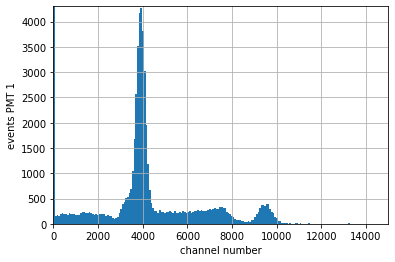

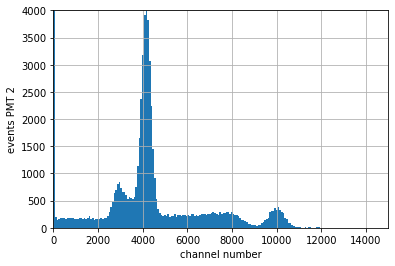

[4.4258e+04 1.5800e+02 1.8300e+02 1.5600e+02 2.0200e+02 2.0500e+02
 1.9100e+02 1.9500e+02 1.7600e+02 2.1400e+02 1.8900e+02 1.9200e+02
 1.8800e+02 1.8100e+02 1.7600e+02 1.7600e+02 2.1400e+02 2.2700e+02
 2.2400e+02 2.1400e+02 2.1600e+02 2.2900e+02 2.0600e+02 1.8900e+02
 1.6500e+02 1.8500e+02 1.7400e+02 1.9400e+02 1.9200e+02 1.9900e+02
 1.8600e+02 1.5700e+02 1.6700e+02 1.5500e+02 1.5500e+02 1.0700e+02
 9.2000e+01 1.2100e+02 1.3500e+02 2.0700e+02 2.8700e+02 3.9800e+02
 4.4000e+02 5.1700e+02 5.3500e+02 6.0500e+02 6.9700e+02 1.0490e+03
 1.6820e+03 2.5590e+03 3.5210e+03 4.1650e+03 4.2710e+03 3.8120e+03
 3.0250e+03 1.9530e+03 1.1770e+03 6.6200e+02 4.1600e+02 3.1000e+02
 2.5300e+02 2.5300e+02 2.1900e+02 2.7200e+02 2.3700e+02 2.2400e+02
 2.1600e+02 2.3000e+02 2.3900e+02 2.5800e+02 2.3900e+02 2.0900e+02
 2.4500e+02 2.1000e+02 2.1800e+02 2.2600e+02 2.1500e+02 2.4700e+02
 2.3300e+02 2.1000e+02 2.4000e+02 2.5200e+02 2.1800e+02 2.3100e+02
 2.5100e+02 2.4900e+02 2.7100e+02 2.5000e+02 2.7700e+02 2.5500

In [73]:
x1, bins1, patch = plt.hist(f0_unpacked[2][0], bins=200, range=(0,15000))
bins1 = bins1[:-1]
plt.xlabel('channel number')
plt.ylabel('events PMT 1')
# ymax vorher 610
plt.axis([0, 15000, 0, 4300])
plt.grid(True)
#plt.savefig('raw1.pdf')
plt.show()

x2, bins2, patch = plt.hist(f1_unpacked[2][0], bins=200, range=(0,15000))
bins2 = bins2[:-1]
plt.xlabel('channel number')
plt.ylabel('events PMT 2')
# ymax vorher 790
plt.axis([0, 15000, 0, 4000])
plt.grid(True)
#plt.savefig('raw2.pdf')
plt.show()

print(x1)

Write the histogrammed data to .csv files

In [9]:
len(bins2)

1000

In [16]:
np.savetxt("vac_d2_400.csv", np.transpose(np.array((bins2, x2))), delimiter=",", header="bins, counts")

In [10]:
np.savetxt("vac_d1_400.csv", np.transpose(np.array((bins1, x1))), delimiter=",", header="bins, counts")

### TODO: calibration
* energy = m*channel + b
* fit the two photo-peaks in the Na-22 spectrum with a Gaussian shape (be careful, which are the right peaks)
* from that, deduce the index channel number corresponding to 60% of the second photo-peak of the Co-60 spectrum
* do this separately for both detectors

In [71]:
#define a gauss function with a normalisation constant A, mean mu and std sigma
def gauss(x,A,mu,std):
    return A*np.exp(-(x-mu)**2/(2*std**2))

This is a simple code block to fit a Gaussian to a part of the spectrum.

It should be carefully read to understand what the code does and results of the fit should not be used without reading the documentation of the fitting function and all of its return values.

### Detector 1

### First Peak
A = 4292.5 +- 31.6
mu = 3876.2  +- 1.7
std = 202.2 +- 1.9

### Second Peak
A = 394.3 +- 9.7
mu = 9458.3 +- 9.1
std = -310.1 +- 11.4


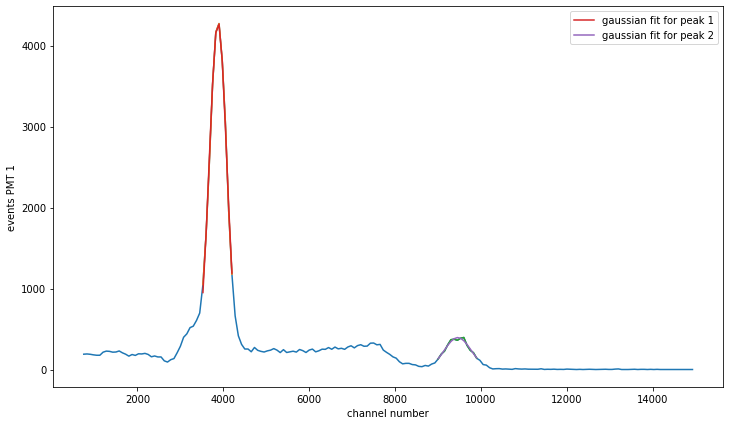

In [77]:
#define a fit range
n_start_1, n_stop_1 = int(3550/75),int(4300/75) 
n_start_2, n_stop_2 = int(9000/75),int(10000/75)

sample_x_1 = bins1[n_start_1:n_stop_1]
sample_y_1 = x1[n_start_1:n_stop_1]
sample_x_2 = bins1[n_start_2:n_stop_2]
sample_y_2 = x1[n_start_2:n_stop_2]

plt.figure(figsize=(12,7))
plt.plot(bins1[10:,],x1[10:,])
plt.plot(sample_x_1,sample_y_1)
plt.plot(sample_x_2,sample_y_2)

#make initial choice for fitting parameters wisely
param_1 = [60,4000,150]
param_2 = [8,9600,100]

fit_result_1 = opt.curve_fit(gauss, sample_x_1, sample_y_1, param_1)
fit_result_2 = opt.curve_fit(gauss, sample_x_2, sample_y_2, param_2)

print("### First Peak")
print(f"A = {str(round(fit_result_1[0][0],1))} +- {str(round(np.sqrt(fit_result_1[1][0][0]),1))}")
print(f"mu = {str(round(fit_result_1[0][1],1))}  +- {str(round(np.sqrt(fit_result_1[1][1][1]),1))}")
print(f"std = {str(round(fit_result_1[0][2],1))} +- {str(round(np.sqrt(fit_result_1[1][2][2]),1))}")
print("")
print("### Second Peak")
print(f"A = {str(round(fit_result_2[0][0],1))} +- {str(round(np.sqrt(fit_result_2[1][0][0]),1))}")
print(f"mu = {str(round(fit_result_2[0][1],1))} +- {str(round(np.sqrt(fit_result_2[1][1][1]),1))}")
print(f"std = {str(round(fit_result_2[0][2],1))} +- {str(round(np.sqrt(fit_result_2[1][2][2]),1))}")

fit_y_1 = [gauss(x,fit_result_1[0][0],fit_result_1[0][1],fit_result_1[0][2]) for x in sample_x_1]
fit_y_2 = [gauss(x,fit_result_2[0][0],fit_result_2[0][1],fit_result_2[0][2]) for x in sample_x_2]

plt.plot(sample_x_1, fit_y_1, label='gaussian fit for peak 1')
plt.plot(sample_x_2, fit_y_2, label='gaussian fit for peak 2')
plt.legend()
plt.xlabel('channel number')
plt.ylabel('events PMT 1')

#plt.axis([0, 0, 0, 0])
#plt.savefig("fit1.pdf")
plt.show()

### Detector 2

### First Peak
A = 79.4 +- 8.3
mu = 3776.3  +- 95.5
std = 200.6 +- 91.2

### Second Peak
A = 6.1 +- 0.8
mu = 9122.7 +- 227.5
std = 324.0 +- 275.2


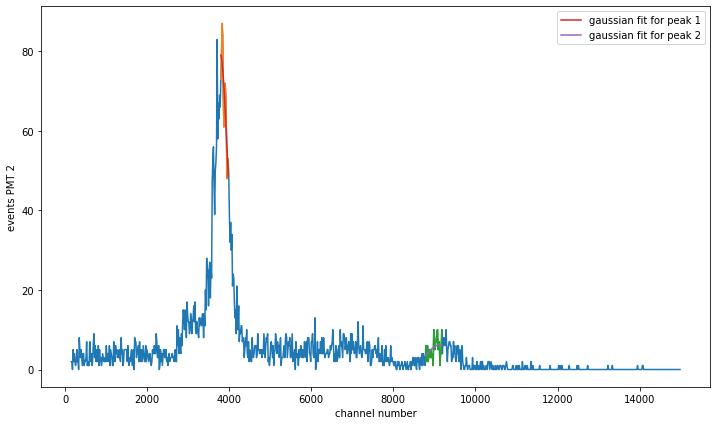

In [13]:
n_start_3, n_stop_3 = int(/15),int(/15) 
n_start_4, n_stop_4 = int(/15),int(/15)

sample_x_3 = bins2[n_start_3:n_stop_3]
sample_y_3 = x2[n_start_3:n_stop_3]
sample_x_4 = bins2[n_start_4:n_stop_4]
sample_y_4 = x2[n_start_4:n_stop_4]

plt.figure(figsize=(12,7))
plt.plot(bins2[10:,],x2[10:,])
plt.plot(sample_x_3,sample_y_3)
plt.plot(sample_x_4,sample_y_4)

param_3 = [60,3900,150]
param_4 = [8,9000,100]

fit_result_3 = opt.curve_fit(gauss, sample_x_3, sample_y_3, param_3)
fit_result_4 = opt.curve_fit(gauss, sample_x_4, sample_y_4, param_4)

print("### First Peak")
print(f"A = {str(round(fit_result_3[0][0],1))} +- {str(round(np.sqrt(fit_result_3[1][0][0]),1))}")
print(f"mu = {str(round(fit_result_3[0][1],1))}  +- {str(round(np.sqrt(fit_result_3[1][1][1]),1))}")
print(f"std = {str(round(fit_result_3[0][2],1))} +- {str(round(np.sqrt(fit_result_3[1][2][2]),1))}")
print("")
print("### Second Peak")
print(f"A = {str(round(fit_result_4[0][0],1))} +- {str(round(np.sqrt(fit_result_4[1][0][0]),1))}")
print(f"mu = {str(round(fit_result_4[0][1],1))} +- {str(round(np.sqrt(fit_result_4[1][1][1]),1))}")
print(f"std = {str(round(fit_result_4[0][2],1))} +- {str(round(np.sqrt(fit_result_4[1][2][2]),1))}")

fit_y_3 = [gauss(x,fit_result_3[0][0],fit_result_3[0][1],fit_result_3[0][2]) for x in sample_x_3]
fit_y_4 = [gauss(x,fit_result_4[0][0],fit_result_4[0][1],fit_result_4[0][2]) for x in sample_x_4]

plt.plot(sample_x_3, fit_y_3, label='gaussian fit for peak 1')
plt.plot(sample_x_4, fit_y_4, label='gaussian fit for peak 2')
plt.legend()
plt.xlabel('channel number')
plt.ylabel('events PMT 2')

#plt.axis([0, 0, 0, 0])
plt.savefig("fit2.pdf")
plt.show()

### Do the energy calibration to determine the 60% (maybe higher is better?) threshold

using E = m*channel + b

In [14]:
channel_peak_1 = fit_result_1[0][1]
channel_peak_2 = fit_result_2[0][1]

E_1, E_2 = 0.511, 1.275 #Energies in MeV for Na-22

E_Co = 1.332 #Energy in MeV of the second photo-peak of Co-60

m1 = (E_2 - E_1)/(channel_peak_2 - channel_peak_1)
b1 = (channel_peak_2 * E_1 - channel_peak_1 * E_2)/(channel_peak_2 - channel_peak_1)

print(f"m1 = {round(m1,7)} MeV/channel")
print(f"b1 = {round(b1,4)} MeV")

ch_threshold1 = (0.6 * E_Co - b1)/m1

print(f"60% of the second peak's energy equals to channel number {ch_threshold1}")
print()

channel_peak_3 = fit_result_3[0][1]
channel_peak_4 = fit_result_4[0][1]

m2 = (E_2 - E_1)/(channel_peak_4 - channel_peak_3)
b2 = (channel_peak_4 * E_1 - channel_peak_3 * E_2)/(channel_peak_4 - channel_peak_3)

print(f"m2 = {round(m2,7)} MeV/channel")
print(f"b2 = {round(b2,4)} MeV")

ch_threshold2 = (0.6 * E_Co - b2)/m2

print(f"60% of the second peak's energy equals to channel number {ch_threshold2}")

m1 = 0.000134 MeV/channel
b1 = -0.0276 MeV
60% of the second peak's energy equals to channel number 6171.0240008938745

m2 = 0.0001429 MeV/channel
b2 = -0.0286 MeV
60% of the second peak's energy equals to channel number 5793.05828751265


### Search for coincidences in the Co-60 data

In [17]:
print(len(xList1), len(tDAQ1), len(tDAQ1)) #to avoid further errors

coinc1, eCoinc1, tCoinc1 = [], [], []
coinc2, eCoinc2, tCoinc2 = [], [], []
dtCoinc, eSum = [], []

if len(xList1) != len(xList2):
    print("Warning: different event numbers")

for i in range(len(xList1)):
    if tDAQ1[i] != tDAQ2[i]:
        print("different times in event ",i)

    # uncomment the following line to calculate random coincidences
    #if abs(tList1[i] - tList2[i]) > 200 and abs(tList1[i] - tList2[i]) < 400 and xList1[i]>int(ch_threshold1) and xList2[i]>int(ch_threshold2):
    if abs(tList1[i] - tList2[i]) < 100 and xList1[i]>int(ch_threshold1) and xList2[i]>int(ch_threshold2):
        
        coinc1.append(eventList1[i]) 
        eCoinc1.append(xList1[i]) 
        tCoinc1.append(tList1[i])
        
        coinc2.append(eventList2[i])
        eCoinc2.append(xList2[i]) 
        tCoinc2.append(tList2[i])
        
        dtCoinc.append(tList1[i]-tList2[i])
        eSum.append(xList1[i]+xList2[i])

nCoinc = len(eCoinc1)

n1 = len([x for x in xList1 if x>int(ch_threshold1)]) # total number of events above the threshold
n2 = len([x for x in xList2 if x>int(ch_threshold2)])

print(f"Number of events PMT 0:      {n1}")
print(f"Number of events PMT 1:      {n2}")
print(f"Number of coincident events: {nCoinc}")

9678 9678 9678
Number of events PMT 0:      1355
Number of events PMT 1:      1210
Number of coincident events: 0


### Resolving coincidence time

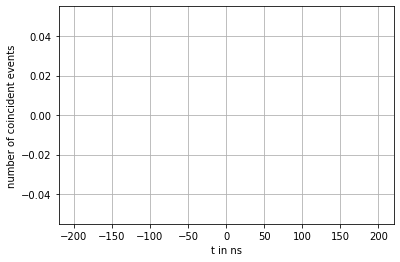

In [18]:
plt.hist(dtCoinc, bins=20, range=(-200,200))
#plt.axis([-0, 0, 0, 0])
plt.grid(True)
plt.xlabel("t in ns")
plt.ylabel("number of coincident events")
plt.savefig("hist_coin_time.pdf")
plt.show()